# 1) Read in the data, call the dataframe "s"  and check the dimensions of the dataframe

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

s = pd.read_csv('social_media_usage.csv')
print(s.shape)

(1502, 89)


# 2) Define a function called clean_sm that takes one input, x, and uses `np.where` to check whether x is equal to 1. If it is, make the value of x = 1, otherwise make it 0. Return x. Create a toy dataframe with three rows and two columns and test your function to make sure it works as expected

In [67]:
def clean_sm(x):
    x = np.where(x==1, 1,0)
    return x

In [69]:
toy = pd.DataFrame({ 
    'Column1': [4, 3, 0], 
    'Column2': [3, 2, 1] 
})
print(toy)

   Column1  Column2
0        4        3
1        3        2
2        0        1


In [71]:
clean_sm(toy)

array([[0, 0],
       [0, 0],
       [0, 1]])

# 3) Create a new dataframe called "ss". The new dataframe should contain a target column called sm_li which should be a binary variable ( that takes the value of 1 if it is 1 and 0 otherwise (use clean_sm to create this) which indicates whether or not the individual uses LinkedIn, and the following features: income (ordered numeric from 1 to 9, above 9 considered missing), education (ordered numeric from 1 to 8, above 8 considered missing), parent (binary), married (binary), female (binary), and age (numeric, above 98 considered missing). Drop any missing values. Perform exploratory analysis to examine how the features are related to the target.

In [140]:
# Create the DataFrame
ss = s.loc[:, ['income', 'educ2', 'age']]

# Ensure columns are numeric
ss['income'] = pd.to_numeric(ss['income'], errors='coerce')
ss['educ2'] = pd.to_numeric(ss['educ2'], errors='coerce')
ss['age'] = pd.to_numeric(ss['age'], errors='coerce')

# Create column sm_li
ss.loc[:, 'sm_li'] = clean_sm(s['web1h'])

# Create binary columns and convert to integers using .astype(int)
ss.loc[:, 'female'] = (s['gender'] == 2).astype(int)
ss.loc[:, 'married'] = (s['marital'] == 1).astype(int)
ss.loc[:, 'parent'] = (s['par'] == 1).astype(int)

# Handle missing values for income, educ2, and age
ss.loc[:, 'income'] = ss['income'].apply(lambda x: np.nan if x > 9 else x)
ss.loc[:, 'educ2'] = ss['educ2'].apply(lambda x: np.nan if x > 8 else x)
ss.loc[:, 'age'] = ss['age'].apply(lambda x: np.nan if x > 98 else x)

ss.dropna(inplace=True)

print(ss)


      income  educ2   age  sm_li  female  married  parent
0        6.0    4.0  77.0      0       1        0       0
1        5.0    3.0  59.0      0       0        0       0
2        8.0    4.0  60.0      0       1        1       0
3        8.0    8.0  73.0      0       0        0       0
4        7.0    8.0  65.0      1       1        1       0
...      ...    ...   ...    ...     ...      ...     ...
1497     6.0    4.0  41.0      0       0        1       1
1498     2.0    5.0  46.0      1       0        0       0
1499     7.0    3.0  18.0      0       0        0       0
1500     4.0    3.0  23.0      0       1        0       0
1501     4.0    3.0  50.0      0       0        1       1

[1260 rows x 7 columns]


C:\Users\Lenny\AppData\Local\Temp\ipykernel_25804\2197652641.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6. 5. 8. ... 7. 4. 4.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ss.loc[:, 'income'] = ss['income'].apply(lambda x: np.nan if x > 9 else x)
C:\Users\Lenny\AppData\Local\Temp\ipykernel_25804\2197652641.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4. 3. 4. ... 3. 3. 3.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ss.loc[:, 'educ2'] = ss['educ2'].apply(lambda x: np.nan if x > 8 else x)
C:\Users\Lenny\AppData\Local\Temp\ipykernel_25804\2197652641.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[77. 59. 60. ... 18. 23. 50.]' has dtype incompatible with int64, 

# 3a) Exploratory analysis

            income        educ2          age        sm_li       female  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean      5.865873     5.203175    51.253968     0.333333     0.419841   
std       2.474385     1.877501    18.403705     0.471592     0.493729   
min       1.000000     1.000000    18.000000     0.000000     0.000000   
25%       4.000000     4.000000    36.000000     0.000000     0.000000   
50%       6.000000     5.000000    52.000000     0.000000     0.000000   
75%       8.000000     6.000000    65.000000     1.000000     1.000000   
max       9.000000     8.000000    97.000000     1.000000     1.000000   

           married       parent  
count  1260.000000  1260.000000  
mean      0.483333     0.249206  
std       0.499921     0.432725  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       1.000000     0.000000  
max       1.000000     1.000000  


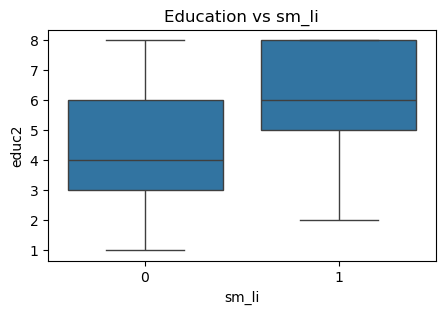

In [182]:
#Statistics
print(ss.describe())

# Relationship between education and sm_li 
plt.figure(figsize=(5, 3)) 
sns.boxplot(x='sm_li', y='educ2', data=ss)
plt.title('Education vs sm_li') 
plt.show()

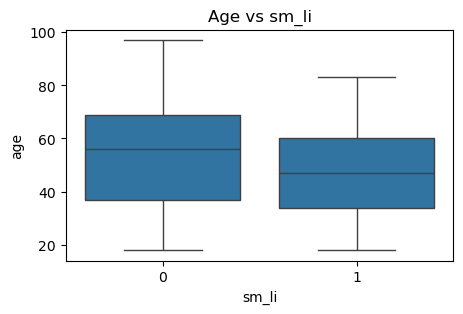

In [185]:
# Relationship between age and sm_li 
plt.figure(figsize=(5, 3)) 
sns.boxplot(x='sm_li', y='age', data=ss)
plt.title('Age vs sm_li') 
plt.show()

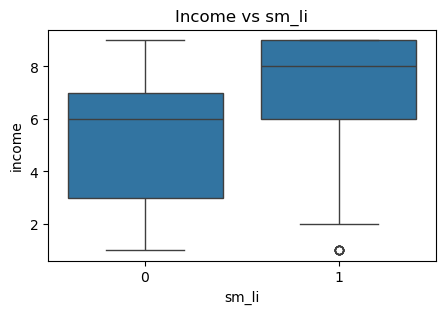

In [187]:
# Relationship between income and sm_li 
plt.figure(figsize=(5, 3)) 
sns.boxplot(x='sm_li', y='income', data=ss)
plt.title('Income vs sm_li') 
plt.show()

In [191]:
import altair as alt
alt.Chart(ss).mark_circle().encode(
    x="age",
    y="income",
    color= alt.Color('sm_li', scale=alt.Scale(scheme='greens')),
    tooltip=["parent", "married", "educ2","sm_li", "female"]).interactive().properties(
    title="Age vs. Income dependent on Linkedin Usage")

alt.Chart(...)

Overall Points:
- People who have at least a two year degree and above, are using LinkedIn
- As people get older, they use LinkedIn less
- People that have higher salaries tend to use LinkedIn

# 4) Create a target vector (y) and feature set (X)

In [196]:
y = ss["sm_li"]
x = ss[["educ2", "income", "age", "married", "female", "parent"]]

# 5) Split the data into training and test sets. Hold out 20% of the data for testing. Explain what each new object contains and how it is used in machine learning

In [199]:
x_train, x_test, y_train, y_test = train_test_split(x.values,
                                                    y, stratify = y,
                                                    test_size=.2,
                                                    random_state=444)

Train
x_train - Contains 80% of the data from the ss dataframe and contains the features (predictor values) used to train the model.
y_train - Contains 80% of the data from the ss dataframe and contains the target we're going to predict.
Test
x_test - Contains 20% of the data from the ss dataframe and contains the features (predictor values) used to test the model on unseen data.
y_test - Contains 20% of the data from the ss dataframe and contains the target will predict when testing the model on unseen data to evaluate.

Essentially we will be using the training data to basically create a model, then run our model using the test data.

# 6)Instantiate a logistic regression model and set class_weight to balanced. Fit the model with the training data.

In [205]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

# 7) Evaluate the model using the testing data. What is the model accuracy for the model? Use the model to make predictions and then generate a confusion matrix from the model. Interpret the confusion matrix and explain what each number means.

In [224]:
#Evaluate model using test data
y_pred = lr.predict(x_test)

#Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=["Predicted Negative", "Predicted Positive"],
             index=["Actual Negative","Actual Positive"])

,Predicted Negative,Predicted Positive
Actual Negative,150,18
Actual Positive,49,35


Accuracy (TP + TN) / (Total)
150+35/ (150+35+18+49) 
185/252
.73
73% Accuracy

True Negative (150) - This is the value that was accurately predicted by the model, so 150 negative classes were predicted correctly
False Positive (18) - The model incorrectly predicted the class of the value. The class was negative however the model predicted positive, resulting in a Type I Error. (Predicting positive when actually negative)
False Negative (49) - Model incorrectly predicted a negative class; class was actually positive, which is a Type II Error.
True Positive (35) - Model correctly predicted positive classes.

# 8) Create the confusion matrix as a dataframe and add informative column names and index names that indicate what each quadrant represents

In [240]:
df = {
    'Predicted Negative': [150, 49],
    'Predicted Positive': [18, 35]
}
# Create the DataFrame
cm = pd.DataFrame(df, index=['Actual Negative', 'Actual Positive'])

# Rename columns
cm.columns = ['Predicted Negative', 'Predicted Positive']
cm.index = ['Actual Negative (TN / FP)', 'Actual Positive (FN / TP)']

# Print DataFrame
print(cm)

                           Predicted Negative  Predicted Positive
Actual Negative (TN / FP)                 150                  18
Actual Positive (FN / TP)                  49                  35


# 9) Aside from accuracy, there are three other metrics used to evaluate model performance: precision, recall, and F1 score. Use the results in the confusion matrix to calculate each of these metrics by hand. Discuss each metric and give an actual example of when it might be the preferred metric of evaluation. After calculating the metrics by hand, create a classification_report using sklearn and check to ensure your metrics match those of the classification_report.

## Results:
Recall: TP/(TP+FN) - Care moreso for the missing positive cases
35/(35+49) = .4166666667
A recall of .42 means that 42% of the actual positive cases were identified were correct. This means that there is room to improve our model to identify more postive cases. When diposing of a property one important factor is correctly identifying properties with active maintenance issues. Companies do not want to retain properties that are a money pit, therefore it is important to have a high recall percantage. Otherwise this could lead to incorrectly disposng of a property.

Precision: TP/(TP+FP) - Goal to minimize incorrect positive cases
35/(35+18) = .660377358
A precision of .66 means that 66% of the positive values predicted were correctly predicted while 34% were false positives. The goal of this metric is to minimize false positives. Precision is important when handling clients applying for apartments. There is software set to specific parameters that will weed out applicants. This helps to flag/eliminate any potential fraud applicants or ones not qualified.

F1 Score: (2 * Precision * Recall) / (Precision + Recall)
(2*.66*.42) / (.66+.42)
.5544 / 1.08
.5133
An F1 Score is a way of balancing precision and recall, essentially evaluating if there are no false postivies or negatives within the predicted model. An F1 score is useful when predicting market trends in Real Estate, because it balances precision and recall. It identifies multiple trends while also predicting which of those trends are valid. For example, there could be trends of increased crime, increased littering, and competitor rents staying stagnant. F1 assist with the imbalance in trends to identify the valid and significant ones.

In [243]:
#Print Metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82       168
           1       0.66      0.42      0.51        84

    accuracy                           0.73       252
   macro avg       0.71      0.65      0.66       252
weighted avg       0.72      0.73      0.72       252



# 10) Use the model to make predictions. For instance, what is the probability that a high income (e.g. income=8), with a high level of education (e.g. 7), non-parent who is married female and 42 years old uses LinkedIn? How does the probability change if another person is 82 years old, but otherwise the same?

In [260]:
#income, education, non-parent, married, female, age
age42 = np.array([[8, 7, 0, 1, 0, 42]])
age82 = np.array([[8, 8, 0, 1, 0, 82]])
age18 = np.array([[2, 2, 0, 1, 0, 18]])

prob42 = lr.predict_proba(age42)[0, 1] 
prob82 = lr.predict_proba(age82)[0, 1]
prob18 = lr.predict_proba(age18)[0, 1]

print(prob42)
print(prob82)
print(prob18)

0.9916777503919967
0.9996818550879158
0.4322872497468467


When running the prediction on both the Age 42 and 82 both with the same parameters aside from Age, the probability remains at 99%. There is a definitive chance they both use LinkedIn. Additionally to ensure the model works, I tested an 18 year old with the same parameters but a lower education level and the probability was lower, as expected, 43%. 